In [4]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [5]:
TRAIN_DIR = "C:\\Users\\infyz\\.cache\\kagglehub\\datasets\\msambare\\fer2013\\versions\\1\\train"
TEST_DIR = "C:\\Users\\infyz\\.cache\\kagglehub\\datasets\\msambare\\fer2013\\versions\\1\\test"
BATCH_SIZE=64

In [6]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 3995 in folder angry
For training data, found 436 in folder disgust
For training data, found 4097 in folder fear
For training data, found 7215 in folder happy
For training data, found 4965 in folder neutral
For training data, found 4830 in folder sad
For training data, found 3171 in folder surprise


In [7]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 958 in folder angry
For testing data, found 111 in folder disgust
For testing data, found 1024 in folder fear
For testing data, found 1774 in folder happy
For testing data, found 1233 in folder neutral
For testing data, found 1247 in folder sad
For testing data, found 831 in folder surprise


In [8]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [9]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

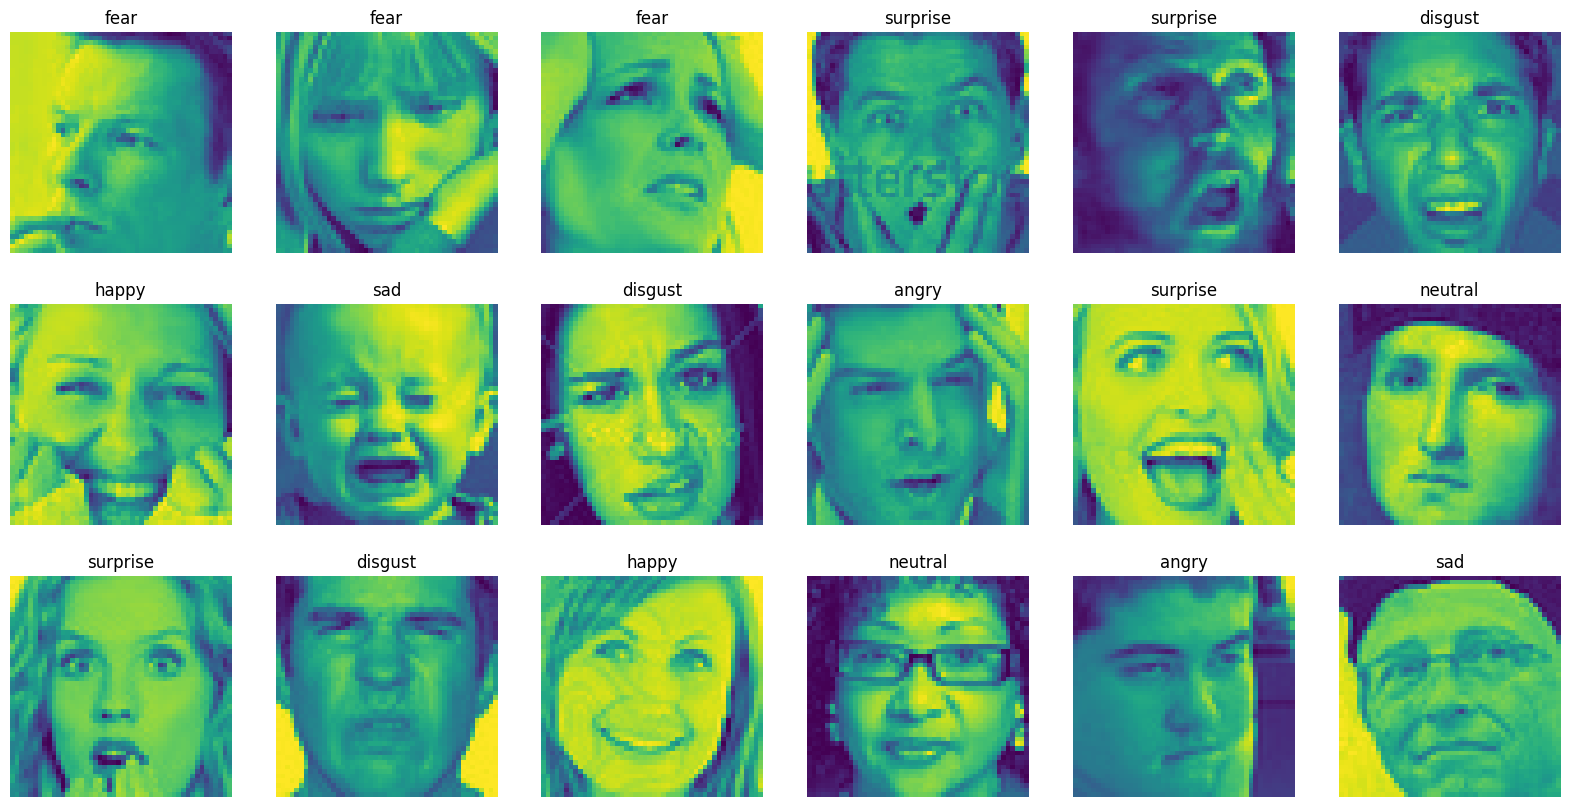

In [12]:
import os
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)  # Ensure correct path format

    if not os.path.exists(target_folder):  # Check if folder exists
        print(f"Error: Directory '{target_folder}' not found.")
        return None

    image_files = os.listdir(target_folder)
    if len(image_files) == 0:
        print(f"Error: No images found in '{target_folder}'")
        return None

    # Get a random image path
    random_image = random.choice(image_files)

    # Read and display the image
    img = mpimg.imread(os.path.join(target_folder, random_image))
    return img

# Main visualization loop
target_dir = r"C:\Users\infyz\.cache\kagglehub\datasets\msambare\fer2013\versions\1\train"

# Get available class names
try:
    class_names = os.listdir(target_dir)
    if not class_names:
        raise FileNotFoundError("No class directories found in training folder.")
except Exception as e:
    print(f"Error: {e}")
    class_names = []

# Plot images
plt.figure(figsize=(20, 10))
for i in range(18):
    plt.subplot(3, 6, i+1)

    if class_names:
        class_name = random.choice(class_names)
        img = view_random_image(target_dir, class_name)
        if img is not None:
            plt.imshow(img)
            plt.title(class_name)
            plt.axis("off")
plt.show()


In [13]:
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [17]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 7, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
## model summary
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,692,519 (14.09 MB)

 Trainable params: 3,692,519 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('model1.h5')  

Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 253s 563ms/step - accuracy: 0.2736 - loss: 1.7663 - val_accuracy: 0.4039 - val_loss: 1.5502
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 197s 418ms/step - accuracy: 0.4000 - loss: 1.5601 - val_accuracy: 0.4301 - val_loss: 1.4681
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 175s 391ms/step - accuracy: 0.4279 - loss: 1.4771 - val_accuracy: 0.4553 - val_loss: 1.4251
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 215s 420ms/step - accuracy: 0.4581 - loss: 1.4178 - val_accuracy: 0.4629 - val_loss: 1.3787
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 301s 671ms/step - accuracy: 0.4686 - loss: 1.3922 - val_accuracy: 0.4707 - val_loss: 1.3601
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 292s 650ms/step - accuracy: 0.4788 - loss: 1.3535 - val_accuracy: 0.4790 - val_loss: 1.3491
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 190s 423ms/step - accuracy: 0.4974 - loss: 1.3220 - val_accuracy: 0.4911 - val_loss: 1.3213
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 216s 453ms/step - accuracy: 0.5007 -

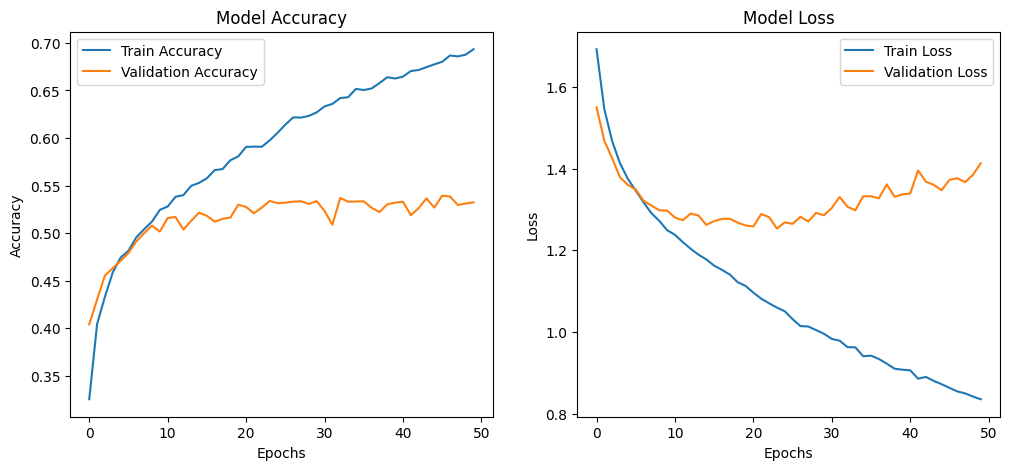

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step


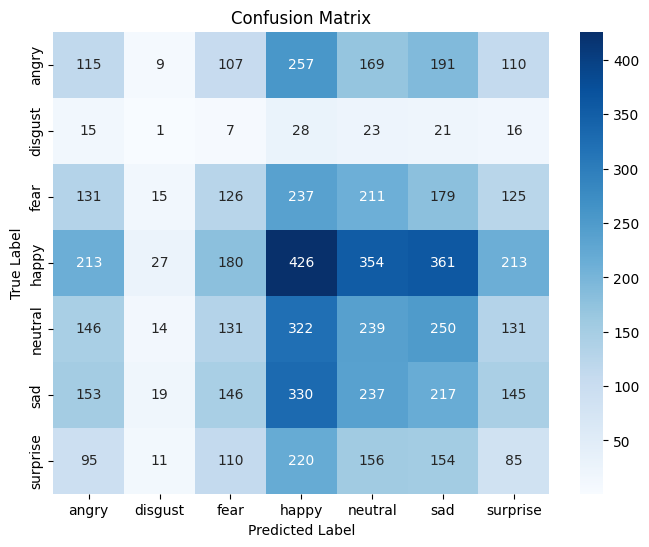


Classification Report:
               precision    recall  f1-score   support

       angry       0.13      0.12      0.13       958
     disgust       0.01      0.01      0.01       111
        fear       0.16      0.12      0.14      1024
       happy       0.23      0.24      0.24      1774
     neutral       0.17      0.19      0.18      1233
         sad       0.16      0.17      0.17      1247
    surprise       0.10      0.10      0.10       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('model1.h5')

# Plot Accuracy & Loss Curves
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

# Call function to plot accuracy & loss
plot_history(history)

# Compute confusion matrix
def plot_confusion_matrix(model, test_set):
    # Get true labels and predictions
    y_true = test_set.classes
    y_pred_probs = model.predict(test_set)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    class_labels = list(test_set.class_indices.keys())

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

# Call function to plot confusion matrix
plot_confusion_matrix(model, test_set)


In [22]:
classifier.evaluate(test_set)

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.5295 - loss: 1.4229


[1.4132689237594604, 0.5323209762573242]

In [38]:
import keras
import numpy as np
import cv2
from PIL import Image

# Load model
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

# Define the correct emotion class names
class_names = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']

# Read image as grayscale
image_path = "C:\\Users\\infyz\\.cache\\kagglehub\\datasets\\msambare\\fer2013\\versions\\1\\train\\happy\\Training_50580.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Error: Unable to read the image file at {image_path}. Check if the file exists and is accessible.")

# Convert grayscale to RGB
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Resize image
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))

# Normalize and prepare input
expand_input = np.expand_dims(resize_image, axis=0)
input_data = np.array(expand_input) / 255.0

# Predict
pred = loaded_model.predict(input_data)
pred_probabilities = pred[0]  # Get prediction probabilities
predicted_index = pred_probabilities.argmax()  # Get class index
predicted_confidence = pred_probabilities[predicted_index]  # Get confidence score

# Set threshold (adjust as needed)
threshold = 0.6

# Determine final class output
if predicted_confidence >= threshold:
    predicted_class = class_names[predicted_index]
else:
    predicted_class = "Uncertain"

# Output result
print(f"Predicted Class: {predicted_class} (Confidence: {predicted_confidence:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Class: Happiness (Confidence: 0.96)
